# Data preparation

## Data loading

In [1]:
import pandas as pd
data = pd.read_csv('data/ecommerce.csv', sep=';')
data.head()

,data,totale,settore
0,01-01-2013,613.9658,Calcio
1,04-02-2014,205.2610,Pesca
2,07-07-2014,412.1740,Fitness
3,22-08-2014,656.6700,Fitness
4,26-09-2014,1065.5400,Fitness


In [2]:
data["data"] = pd.to_datetime(data["data"], infer_datetime_format=True)

/opt/anaconda3/envs/OpenCV/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22-08-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/envs/OpenCV/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-09-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/envs/OpenCV/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '22-11-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/envs/OpenCV/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-01-2015

In [3]:
data["settore"].value_counts()

Pesca              2967
Calcio             2943
Casual             2880
Fitness            2834
Running            2225
Trekking           1803
Snowboard          1449
Bambino            1399
Sci                1359
Tennis             1263
Mare               1033
Nuoto               907
Ciclismo            868
Basket              797
Padel               527
Volley              340
Pattini             202
Arti marziali       159
Skateboard          137
Subacquea           136
Ping-pong           103
Baseball             77
Danza                54
Freccette            41
Arceria              32
Golf                 26
Buoni / acconti      24
Rugby                17
Intimo                9
Soft air              4
Name: settore, dtype: int64

In [4]:
totals = data.iloc[-30:]
data = data.iloc[:-30]

In [44]:
sectors = data.loc[(data["settore"] == "Pesca") | (data["settore"] =="Calcio") | (data["settore"] == "Casual")]

In [45]:
sectors.sort_values('data', inplace=True)

/var/folders/58/mbdv_l695f5dn7zb8sb9x6h80000gn/T/ipykernel_77994/1376779852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectors.sort_values('data', inplace=True)


In [46]:
sectors.head()

,data,totale,settore
0,2013-01-01,613.9658,Calcio
6,2014-02-12,247.3870,Calcio
1,2014-04-02,205.2610,Pesca
7,2014-09-12,268.4500,Pesca
17,2015-01-02,246.9740,Calcio


In [47]:
sec_wide = sectors.groupby(['data', 'settore'])['totale'].aggregate('mean').unstack()

In [50]:
sec_wide.columns = ('Football', 'Casual', 'Fishing')

<AxesSubplot:xlabel='data'>

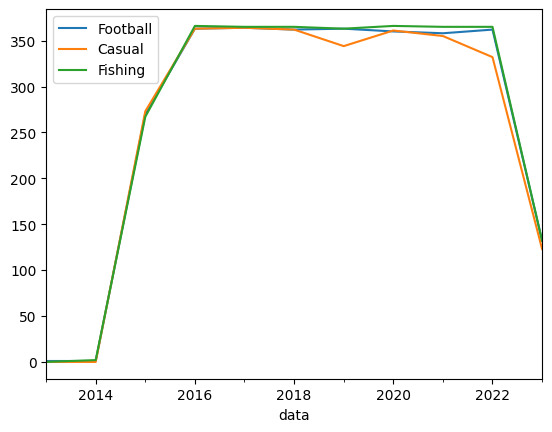

In [51]:
# Date filter
import matplotlib.pyplot as plt

(sec_wide > 0).resample('Y').sum().plot()

In [52]:
start_date = pd.to_datetime('01-01-2016')
end_date = pd.to_datetime('31-12-2022')

sec_wide_filt = sec_wide.loc[start_date:end_date, :]

/var/folders/58/mbdv_l695f5dn7zb8sb9x6h80000gn/T/ipykernel_77994/375005268.py:2: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end_date = pd.to_datetime('31-12-2022')


In [53]:
sec_wide.resample('Y').sum().to_csv('data/yearly.csv')
(sec_wide > 0).resample('Y').sum().to_csv('data/availability.csv')

### NANs analysis

<AxesSubplot:ylabel='data'>

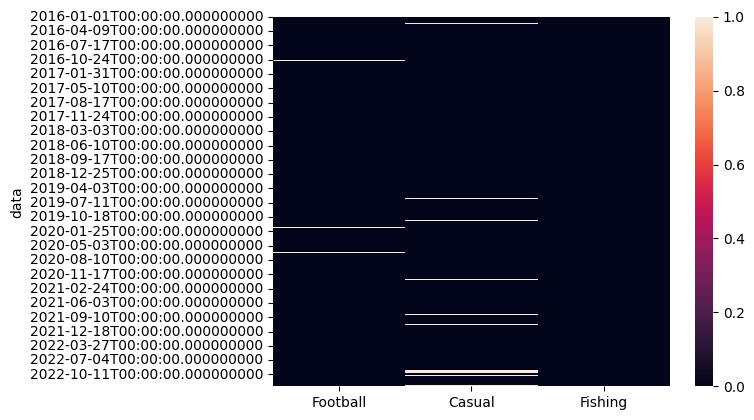

In [54]:
import seaborn as sns
# Nan

sns.heatmap(sec_wide_filt.isna())

In [67]:
sec_wide_filt[sec_wide_filt['Casual'].isna()][-40:]

,Football,Casual,Fishing
data,,,
2021-08-22,1727.1660,NaN,3866.5886
2021-09-16,2766.8935,NaN,3560.9273
2021-10-28,1430.8385,NaN,1886.7905
2021-10-30,1379.0070,NaN,808.8605
2021-10-31,2747.6890,NaN,3220.9457
2021-12-22,1474.4100,NaN,3237.5483
2021-12-25,1402.5480,NaN,195.4316
2022-02-19,3613.3370,NaN,876.2208
2022-02-28,1841.5670,NaN,2083.1720


In [55]:
nans = sec_wide_filt[(sec_wide_filt.isna().sum(axis=1) > 0).values].copy().reset_index()
nans['month'] = nans['data'].apply(lambda x: x.month)

In [56]:
nans['count_na'] = nans.iloc[:, 1:5].isna().sum(axis=1)

<AxesSubplot:xlabel='month'>

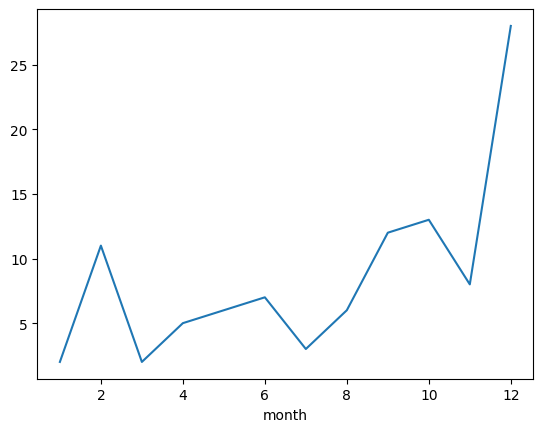

In [57]:
nans.groupby('month').sum()['count_na'].plot()

In [68]:
# Two filling strategies
df1 = sec_wide_filt.interpolate() # interpolation

In [69]:
week = df1.resample('W').sum()
month = df1.resample('M').sum()
trimonth = df1.resample('3M').sum()
yearly = df1.resample('Y').sum()

<AxesSubplot:xlabel='data'>

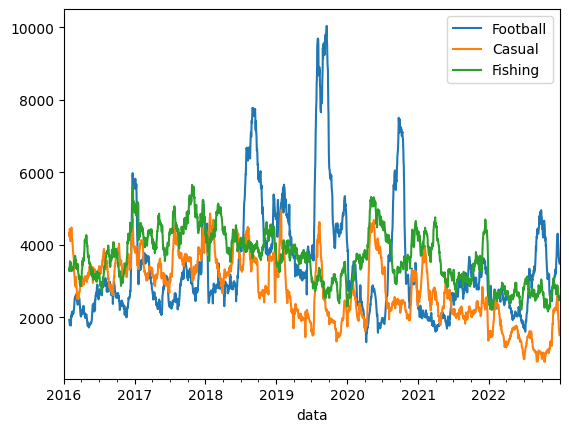

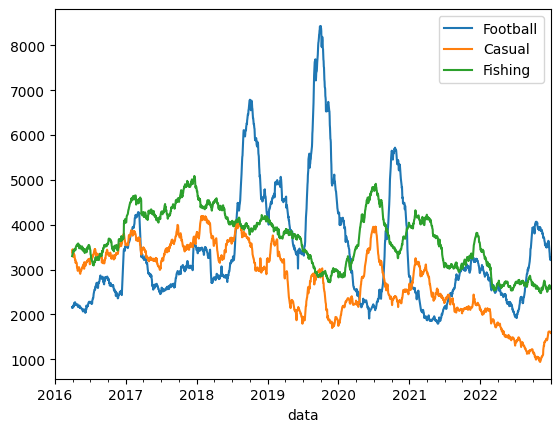

In [70]:
# MM
mm30 = df1.rolling(30).mean()
mm90 = df1.rolling(90).mean()

mm30.plot()
mm90.plot()

In [71]:
# Data for plotting in R
df1.to_csv('data/daily.csv')
week.to_csv('data/weekly.csv')
month.to_csv('data/monthly.csv')
trimonth.to_csv('data/trimestral.csv')
yearly.to_csv('data/yearly.csv')
mm30.to_csv('data/mm30.csv')
mm90.to_csv('data/mm90.csv')